# Neural Network

1.   Data Preparation : get_data() function for preparing tensors(arrays)
2.   Creating learnable parameters : get_weights() weights of the network

1.   Network Model : simple_network()
2.   Loss : loss_fn()

1.   Optimizer : optimize()









In [5]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

Scalar tensor(0-D tensors)

In [6]:
x = torch.rand(10)
print(x)
x.size()

tensor([0.4855, 0.5113, 0.8096, 0.9959, 0.0132, 0.0365, 0.8159, 0.1309, 0.6224,
        0.5737])


torch.Size([10])

Vector (1-D tensors)

In [9]:
temp = torch.FloatTensor([23,24,25,27.2])
print(temp)
temp.size()

tensor([23.0000, 24.0000, 25.0000, 27.2000])


torch.Size([4])

Matrix(2-D tensors)

In [11]:
matrixs =  torch.FloatTensor([[1,2,3],[3,4,5]])
print(matrixs)
matrixs.size()

tensor([[1., 2., 3.],
        [3., 4., 5.]])


torch.Size([2, 3])

Image(3-D tensors)

In [14]:
from PIL import Image

img = np.array(Image.open('/content/drive/MyDrive/weather dataset/weather dataset/test/rain/rain153.jpg').resize((224,224)))
img_tensor = torch.from_numpy(img)
img_tensor.size()

torch.Size([224, 224, 3])

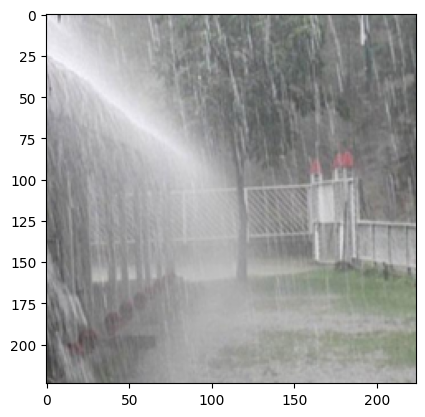

In [17]:
plt.imshow(img)

Tensors on GPU

In [3]:
# On CPU

a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

c = a.matmul(b)
c

tensor([[2493.6272, 2502.4080, 2463.8540,  ..., 2480.7241, 2482.9490,
         2440.5110],
        [2548.7480, 2528.4480, 2491.2576,  ..., 2501.2954, 2511.8525,
         2491.8403],
        [2531.9629, 2544.6641, 2504.4502,  ..., 2515.7227, 2503.4631,
         2496.8933],
        ...,
        [2517.8020, 2512.3108, 2489.7224,  ..., 2489.6030, 2515.7275,
         2488.6414],
        [2505.3086, 2513.2944, 2479.4458,  ..., 2487.3411, 2499.0771,
         2485.7830],
        [2533.3010, 2545.2251, 2513.6472,  ..., 2515.4785, 2521.1179,
         2504.0535]])

In [4]:
# On GPU
a = a.cuda()
b = b.cuda()

d = a.matmul(b)
d

tensor([[2493.6240, 2502.4106, 2463.8523,  ..., 2480.7290, 2482.9465,
         2440.5166],
        [2548.7493, 2528.4526, 2491.2656,  ..., 2501.2996, 2511.8601,
         2491.8467],
        [2531.9573, 2544.6682, 2504.4536,  ..., 2515.7227, 2503.4597,
         2496.8992],
        ...,
        [2517.8015, 2512.3110, 2489.7190,  ..., 2489.5999, 2515.7290,
         2488.6440],
        [2505.3052, 2513.2976, 2479.4436,  ..., 2487.3384, 2499.0754,
         2485.7876],
        [2533.3062, 2545.2283, 2513.6514,  ..., 2515.4800, 2521.1228,
         2504.0542]], device='cuda:0')

Creating data for neural network

In [15]:
def get_data():
  X_train = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
  y_train = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.94,1.3,2.5])
  dtype = torch.FloatTensor
  X = Variable(torch.from_numpy(X_train).type(dtype),requires_grad=False).view(17,1)
  y = Variable(torch.from_numpy(y_train).type(dtype),requires_grad=False)
  return X,y

Creating Learnable Parameters

In [9]:
def get_weights():
  w = Variable(torch.randn(1),requires_grad=True)
  b = Variable(torch.randn(1),requires_grad=True)

  return w,b

Defing model

In [10]:
# this similar to f= nn.linear() present in torch.nn

def simple_network(x):
  y_pred = torch.matmul(x,w)+b
  return y_pred

Loss function

In [22]:
def loss_fn(y,y_pred):
  loss = (y_pred-y).pow(2).sum()

  for params in [w,b]:
    if not params.grad is None:
      params.grad.data.zero_()
  loss.backward()
  return loss.data

optimize the neural network

In [20]:
def optimize(learning_rate):
  w.data -= learning_rate * w.grad.data
  b.data -= learning_rate * b.grad.data

first model

In [25]:
x,y = get_data()
w,b = get_weights()

for i in range(500):
  y_pred = simple_network(x)
  loss = loss_fn(y,y_pred)
  if i%50 == 0:
    print(loss)
  optimize(0.01)

tensor(3396.7869)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
